In [40]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

In [41]:
n = 3          # index of square grating
a = 1.2            # period 
d = 0.5*a            # side of square
t = 0.3          # thickness of grating
dpml = 1         # PML thickness
pad = 1          # padding between grating and PML

res = 50         # pixels/μm
pol = mp.Ex     # polarization

In [42]:
gel = mp.Medium(index=1)
block = mp.Block(mp.Vector3(d,t), center=mp.Vector3(0,0), material=mp.Medium(index=n))

In [43]:
w_min = 0.5
w_max = 1.5
f_max = 1/w_min
f_min = 1/w_max

fcen = 0.5*(f_min+f_max)
df = f_max-f_min
nfreqs = 50

src = mp.Source(mp.GaussianSource(fcen, fwidth=df), pol, center=mp.Vector3(y=-t/2-pad+0.1), size=mp.Vector3(a))

In [45]:
cell = mp.Vector3(a, 2*(t/2+pad+dpml))

sim = mp.Simulation(cell_size=cell,
                    default_material=gel,
                    sources=[src],
                    resolution=res,
                    boundary_layers=[mp.PML(dpml,direction = mp.Y)],#[mp.PML(dpml, direction=mp.Y)],
                    k_point=mp.Vector3())

refl = sim.add_flux(fcen, df, nfreqs, mp.FluxRegion(center=mp.Vector3(y=-t/2-pad+0.2), size=mp.Vector3(a)))
tran = sim.add_flux(fcen, df, nfreqs, mp.FluxRegion(center=mp.Vector3(y=t/2+pad-0.1), size=mp.Vector3(a)))

sim.run(until_after_sources=mp.stop_when_fields_decayed(100, pol, mp.Vector3(y=t/2+pad-0.1), 1e-7))
straight_refl_data = sim.get_flux_data(refl)
straight_tran_flux = mp.get_fluxes(tran)

-----------
Initializing structure...
time for choose_chunkdivision = 5.31673e-05 s
Working in 2D dimensions.
Computational cell is 1.2 x 4.3 x 0 with resolution 50
time for set_epsilon = 0.0150301 s
-----------
field decay(t = 100.01): 0.2478005571409319 / 0.2478005571409319 = 1.0
field decay(t = 200.02): 2.9985284886119856e-22 / 0.2478005571409319 = 1.2100572021339843e-21
run 0 finished at t = 200.02 (20002 timesteps)


<AxesSubplot:xlabel='X', ylabel='Y'>

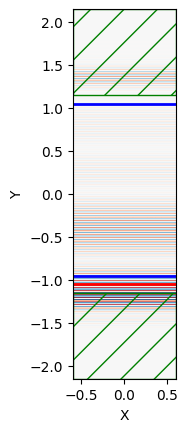

In [46]:
sim.plot2D(fields=pol)

In [47]:
sim.reset_meep()

sim = mp.Simulation(cell_size=cell,
                    default_material=gel,
                    geometry=[block],
                    sources=[src],
                    resolution=res,
                    boundary_layers=[mp.PML(dpml,direction = mp.Y)],#[mp.PML(dpml, direction=mp.Y)],
                    k_point=mp.Vector3())

refl = sim.add_flux(fcen, df, nfreqs, mp.FluxRegion(center=mp.Vector3(y=-t/2-pad+0.2), size=mp.Vector3(a)))
tran = sim.add_flux(fcen, df, nfreqs, mp.FluxRegion(center=mp.Vector3(y=t/2+pad-0.1), size=mp.Vector3(a)))

sim.load_minus_flux_data(refl, straight_refl_data)

sim.run(until_after_sources=mp.stop_when_fields_decayed(100, pol, mp.Vector3(y=t/2+pad-0.1), 1e-7))

bend_refl_flux = mp.get_fluxes(refl)
bend_tran_flux = mp.get_fluxes(tran)

flux_freqs = mp.get_flux_freqs(refl)

-----------
Initializing structure...
time for choose_chunkdivision = 6.58035e-05 s
Working in 2D dimensions.
Computational cell is 1.2 x 4.3 x 0 with resolution 50
     block, center = (0,0,0)
          size (0.6,0.3,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (9,9,9)
time for set_epsilon = 0.016865 s
-----------
field decay(t = 100.01): 0.03666814016870384 / 0.03666814016870384 = 1.0
field decay(t = 200.02): 4.7994416976762885e-08 / 0.03666814016870384 = 1.308886045377507e-06
field decay(t = 300.03000000000003): 9.262282190308602e-11 / 0.03666814016870384 = 2.5259754510849e-09
run 0 finished at t = 300.03000000000003 (30003 timesteps)


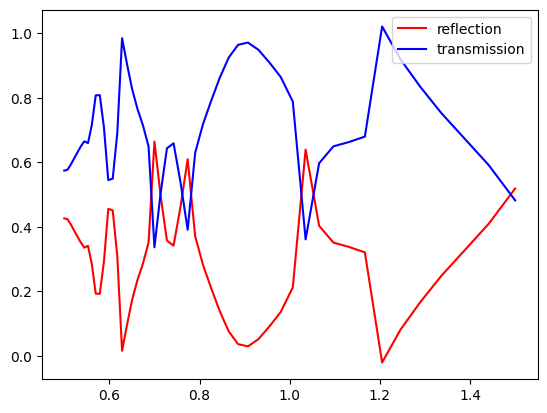

In [48]:
freqs = np.array(flux_freqs)
wl = 1/freqs
R = -np.array(bend_refl_flux)/np.array(straight_tran_flux)
T = np.array(bend_tran_flux)/np.array(straight_tran_flux)

plt.plot(wl, R, 'r-', label='reflection')
plt.plot(wl, T, 'b-', label='transmission')
plt.legend()

     block, center = (0,0,0)
          size (0.6,0.3,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (9,9,9)


<AxesSubplot:xlabel='X', ylabel='Y'>

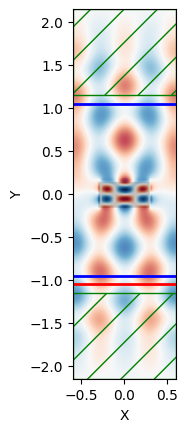

In [49]:
sim.plot2D(fields=pol)